<a href="https://colab.research.google.com/github/alimoorreza/cs195-fall24-notes/blob/main/cs195_pytorch_basics_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS195: Day04

## PyTorch Library

### CS195: Computer Vision, Fall 2024

Wednesday, September 18th, 2024

📆 [Course Schedule](https://analytics.drake.edu/~reza/teaching/cs195_fall24/cs195_schedule.html) | 📜 [Syllabus](https://analytics.drake.edu/~reza/teaching/cs195_fall24/cs195_syllabus_sp24.pdf)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import torch

Mounted at /content/drive


## Introduction to PyTorch

We can use PyTorch Framework to build and train MLPs and other neural networks such as CNN, RNN, LSTM, Transformers. Let's learn the basics of PyTorch.

__Tensor__: are similar to NumPy's ndarrays, except that tensors can run on GPUs or other hardware accelerators. Tensors are optimized for automatic differentiation (PyTorch's Autograd)

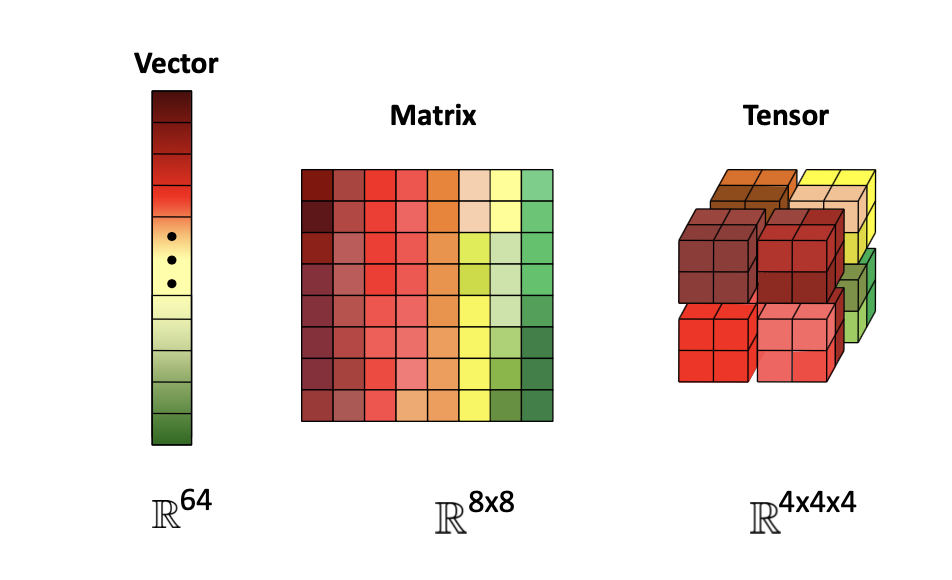

In [ ]:
# import torch library
import torch
import numpy as np
import torch.nn as nn

# Creating Convolution and Pooling Layers using PyTorch

## **Let's build a 2D convolution layer**
- [nn.Conv2d()](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html)
  - applies a 2D convolution over an input volume of $(C_{in}​,H_{in},W_{in})$ and produces an output volume of $(C_{out}​,H_{out},W_{out})$   between two adjacent layers.
  - to create this, you need to provide the followings:
    - __channel_dimension_of_input_layer__ i.e., $C_{in}$
    - __channel_dimension_of_output_layer__ i.e., $C_{out}$
    - __filter_size__ i.e., $F$

  - the other two optional parameters are __stride__: $S=1$ and __padding__: $P=0$, with default values as shown. As discussed in class, PyTorch will calculate internally the sizes of output volume $H_{out}$ and $W_{out}$ from the above mentioned parameter values


> For example, let's create a 2D convolution layer by specify the following:
>> input volume channels size is 1

>> output volume channel size is 32

>> each filter has a size of (3x3)

>> default stride size is 1

>> default padding size is 0

In [ ]:
# construction of a 2D convolutional layer (useful for feature map learning from the grid layouts of an image)
input_volume_channel_first  = 8
output_volume_channel_first = 8
filter_size                 = 3


first_conv_2d               = nn.Conv2d(input_volume_channel_first, output_volume_channel_first, filter_size)  # 2D convolutional transformation module :input_volume_channel=1, output_volume_channel=32, filter_size= (3x3)
#first_conv_2d               = nn.Conv2d(input_volume_channel_first, output_volume_channel_first, filter_size)  # 2D convolutional transformation module :input_volume_channel=1, output_volume_channel=32, filter_size= (3x3)
#relu_activation_1st         = nn.ReLU()


##**Inspecting the weights of a 2D convolution layer**

In [ ]:
# Print the weights of the linear layer
print(f'Weights: \n{first_conv_2d.weight.data}')

# Print the biases of the linear layer (if they exist)
print(f'Biases: \n{first_conv_2d.bias.data}')

## **Let's generate a random input for our linear layer and plug it into our layer**

In [ ]:
# Step 1: let's generate 1 random sample tensor of shape (B, C, H, W) for the above 2D convolutional network
torch.manual_seed(0) # for reproducibility (you will get the same random number every time you run this cell)

number_of_samples = 1
image_channel     = 8
image_height      = 7
image_width       = 6

random_X              = torch.randn(number_of_samples, image_channel, image_width, image_height)
print(f'input shape: \n{random_X.shape}\n')
#print(f'input numbers: \n{random_X.numpy()}\n') # it will produce a large tensor of values



# Step 2: apply forward pass through the network
output                = first_conv_2d(random_X)
print(f'output shape: \n{output.data.shape}\n')
#print(f'output layer value: \n{output.data.numpy()}\n') # it will produce a large tensor of values


input shape: 
torch.Size([1, 8, 6, 7])

output shape: 
torch.Size([1, 8, 4, 5])



##**Group Exercise#1**
Create a new 2D convolution layer with the following structure:

> its input volume has 3 channels

> the output volume will be of 64 channels

> each filter has a size of (5x5)

> default stride size is 1 (don't need to change that but you are free to explore)

> default padding size is 0 (don't need to change that but you are free to explore)


In [ ]:
# your code here
# ...
# ...
# ...

##**Group Exercise#2**

> apply a tensor through your 2D convolution layer now.

> change the value in torch.manual_seed(0) to something else, generate new inputs, and pass the tensor through your 2D convolution layer.

> observe the the output shapes specially (since the values are hard to inspect so we will leave them for later classes)

> convince yourself that the shapes you are observing match your hand calculations.

In [ ]:
# your code here
# ...
# ...
# ...

## **Let's add an activation function such as *ReLu(), tanh(), or sigmoid()* after your 2D convolution layer and run the experiment again to see how it changes the outputs.**

In [ ]:
# construction of a 2D convolutional layer (useful for feature map learning from the grid layouts of an image)
input_volume_channel_first  = 1
output_volume_channel_first = 32
filter_size                 = 3

first_conv_2d               = nn.Conv2d(input_volume_channel_first, output_volume_channel_first, filter_size)  # 2D convolutional transformation module :input_volume_channel=1, output_volume_channel=32, filter_size= (3x3)
relu_activation             = nn.ReLU()
sigmoid_activation          = nn.Sigmoid()
tanh_activation             = nn.Tanh()



##**Using Sigmoid activation function**

In [ ]:
# Step 1: let's generate 1 random sample tensor of shape (B, C, H, W) for the above 2D convolutional network
torch.manual_seed(0) # for reproducibility (you will get the same random number every time you run this cell)

number_of_samples = 1
image_channel     = 1
image_height      = 28
image_width       = 28

random_X              = torch.randn(number_of_samples, image_channel, image_width, image_height)
print(f'input shape: \n{random_X.shape}\n')
#print(f'input numbers: \n{random_X.numpy()}\n') # it will produce a large tensor of values



# Step 2: apply forward pass through the network
output                    = first_conv_2d(random_X)
print(f'output shape: \n{output.data.shape}\n')
#print(f'output layer value: \n{output.data.numpy()}\n') # it will produce a large tensor of values
output_after_activation   = sigmoid_activation(output)
print(f'No change in output shape after activation: \n{output.data.shape}\n')
#print(f'output layer value (each number could have any value): \n{output.data.numpy()}\n')
#print(f'Sigmoid activation value (each number must be within [0.0 to 1.0]): \n{output_after_activation.data.numpy()}\n')


input shape: 
torch.Size([1, 1, 28, 28])

output shape: 
torch.Size([1, 32, 26, 26])

No change in output shape after activation: 
torch.Size([1, 32, 26, 26])



##**Using ReLU activation function**

In [ ]:
# Step 1: let's generate 1 random sample tensor of shape (B, C, H, W) for the above 2D convolutional network
torch.manual_seed(0) # for reproducibility (you will get the same random number every time you run this cell)

number_of_samples = 1
image_channel     = 1
image_height      = 28
image_width       = 28

random_X              = torch.randn(number_of_samples, image_channel, image_width, image_height)
print(f'input shape: \n{random_X.shape}\n')
#print(f'input numbers: \n{random_X.numpy()}\n') # it will produce a large tensor of values



# Step 2: apply forward pass through the network
output                    = first_conv_2d(random_X)
print(f'output shape: \n{output.data.shape}\n')
#print(f'output layer value: \n{output.data.numpy()}\n') # it will produce a large tensor of values
output_after_activation   = relu_activation(output)
print(f'No change in output shape after activation: \n{output.data.shape}\n')
#print(f'output layer value (each number could have any value): \n{output.data.numpy()}\n')
#print(f'ReLU activation value (each number must be within [0.0 to infinity] NO NEGATIVE NUMBER): \n{output_after_activation.data.numpy()}\n')


input shape: 
torch.Size([1, 1, 28, 28])

output shape: 
torch.Size([1, 32, 26, 26])

No change in output shape after activation: 
torch.Size([1, 32, 26, 26])



##**Group Exercise#3**

> Experiment with different activation functions like sigmoid, and relu, and then pass a tensor through the linear layer you created for Group Exercises #1 and #2.

> Take a look at the output shapes and values and make sure they match what you were expecting!

In [ ]:
# your code here
# ...
# ...
# ...


## **Let's build a 3 layer convolutional neural network (CNN)!**

First convolution layer has:
  > its input volume has 3 channels (inputs are RGB color images)

  > the output volume will have 64 channels

  > each filter has a size of (3x3)

Second convolution layer has:
  > its input volume has 64 channels

  > the output volume will have 128 channels

  > each filter has a size of (3x3)


In [ ]:
# construction
input_volume_channel_first    = 3
output_volume_channel_first   = 32
input_volume_channel_second   = 32
output_volume_channel_second  = 128
filter_size                   = 3

first_conv_2d                 = nn.Conv2d(input_volume_channel_first, output_volume_channel_first, filter_size)  # 2D convolutional transformation module :input_volume_channel=1, output_volume_channel=32, filter_size= (3x3)
first_relu_activation         = nn.ReLU()
second_conv_2d                = nn.Conv2d(input_volume_channel_second, output_volume_channel_second, filter_size)  # 2D convolutional transformation module :input_volume_channel=1, output_volume_channel=32, filter_size= (3x3)
second_relu_activation        = nn.ReLU()




## **We can apply a tensor through the CNN layers now**

In [ ]:
# Step 1: let's generate 1 random sample tensor of shape (B, C, H, W) for the above 2D convolutional network
torch.manual_seed(0) # for reproducibility (you will get the same random number every time you run this cell)

number_of_samples = 1
image_channel     = 3
image_height      = 28
image_width       = 28

random_X              = torch.randn(number_of_samples, image_channel, image_width, image_height)
print(f'input shape: \n{random_X.shape}\n')
#print(f'input numbers: \n{random_X.numpy()}\n') # it will produce a large tensor of values



# Step 2: apply forward pass through the network
output                    = first_conv_2d(random_X)
print(f'First conv2d: output shape: \n{output.data.shape}\n')
output                    = first_relu_activation(output)
print(f'First activation: output shape (no change): \n{output.data.shape}\n')

output                    = second_conv_2d(output)
print(f'Second conv2d: output shape: \n{output.data.shape}\n')
output                    = second_relu_activation(output)
#print(f'output layer value: \n{output.data.numpy()}\n') # it will produce a large tensor of values
print(f'Second activation: output shape (no change): \n{output.data.shape}\n')





input shape: 
torch.Size([1, 3, 28, 28])

First conv2d: output shape: 
torch.Size([1, 32, 26, 26])

First activation: output shape (no change): 
torch.Size([1, 32, 26, 26])

Second conv2d: output shape: 
torch.Size([1, 128, 24, 24])

Second activation: output shape (no change): 
torch.Size([1, 128, 24, 24])



#**Group Exercise#4**
Let's create a CNN with three conv2d layers and connect them in a sequence with the following structure:

First convolution layer has:
  > its input volume has 3 channels

  > the output volume will be of 64 channels

  > each filter has a size of (5x5)

Second convolution layer has:
  > its input volume has 64 channels

  > the output volume will be of 128 channels

  > each filter has a size of (5x5)

Third convolution layer has:
  > its input volume has 128 channels

  > the output volume will be of 256 channels

  > each filter has a size of (5x5)


In [ ]:
# your code here
# ...
# ...
# ...

## **Group Exercise#5**
> Apply a tensor through your CNN layers now.

In [ ]:
# your code here
# ...
# ...
# ...

[MaxPool2d()](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html)


In [ ]:
# construction of a 2D max pooling layer (useful for feature map learning from the grid layouts of an image)

# maxpool2d hyper-parameters
pooling_filter_size         = 2

# conv2d hyperparameters
input_volume_channel_first  = 3
output_volume_channel_first = 64
conv_filter_size            = 3


first_conv_2d               = nn.Conv2d(input_volume_channel_first, output_volume_channel_first, conv_filter_size)  # 2D convolutional transformation module :input_volume_channel=3, output_volume_channel=32, filter_size= (3x3)
relu_activation             = nn.ReLU()
maxpool_layer               = nn.MaxPool2d(pooling_filter_size, stride=2)





## **We can apply a tensor through the Conv2d -> ReLU -> MaxPool2d layers now**

In [ ]:
# Step 1: let's generate 1 random sample tensor of shape (B, C, H, W) for the above 2D convolutional network
torch.manual_seed(0) # for reproducibility (you will get the same random number every time you run this cell)

number_of_samples = 1
image_channel     = 3
image_height      = 28
image_width       = 28

random_X              = torch.randn(number_of_samples, image_channel, image_width, image_height)
print(f'input shape: \n{random_X.shape}\n')
#print(f'input numbers: \n{random_X.numpy()}\n') # it will produce a large tensor of values



# Step 2: apply forward pass through the network
output                    = first_conv_2d(random_X)
print(f'Conv2d: output shape: \n{output.data.shape}\n')
output                    = relu_activation(output)
print(f'ReLU activation: output shape (no change): \n{output.data.shape}\n')
output                    = maxpool_layer(output)
print(f'MaxPool2d: output shape: \n{output.data.shape}\n')




input shape: 
torch.Size([1, 3, 28, 28])

Conv2d: output shape: 
torch.Size([1, 64, 26, 26])

ReLU activation: output shape (no change): 
torch.Size([1, 64, 26, 26])

MaxPool2d: output shape: 
torch.Size([1, 64, 13, 13])



## **You can build your CNN (eg, Conv2d -> ReLU -> MaxPool2d layers) using nn.Sequential() module**

> [nn.Sequential()](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html)

In [ ]:
# you can also create a single module using nn.Sequential() as follows:
# advantage: simple code but you won't be able to see intermediate output shapes
my_cnn = nn.Sequential( nn.Conv2d(input_volume_channel_first, output_volume_channel_first, conv_filter_size),
                        nn.ReLU(),
                        nn.MaxPool2d(pooling_filter_size, stride=2))


print(f'full   CNN  : \n------------------\n{my_cnn}\n------------------\n')
print(f'first  layer: \n{my_cnn[0]}\n------------------')
print(f'second layer: \n{my_cnn[1]}\n------------------')
print(f'third  layer: \n{my_cnn[2]}\n------------------')

full   CNN  : 
------------------
Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)
------------------

first  layer: 
Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
------------------
second layer: 
ReLU()
------------------
third  layer: 
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
------------------


In [ ]:
# you can apply everything at once using one call
output = my_cnn(random_X)
print(f'Final (MaxPool2d): output shape: \n{output.data.shape}\n')

Final (MaxPool2d): output shape: 
torch.Size([1, 64, 26, 26])



In [ ]:
# individually you can also apply forward pass using different indices
output = my_cnn[0](random_X)
print(f'output shape: \n{output.data.shape}\n')
output = my_cnn[1](output)
print(f'output shape: \n{output.data.shape}\n')
output = my_cnn[2](output)
print(f'output shape: \n{output.data.shape}\n')

output shape: 
torch.Size([1, 64, 26, 26])

output shape: 
torch.Size([1, 64, 26, 26])

output shape: 
torch.Size([1, 64, 13, 13])



## **Group Exercise#6**
> Replace your MaxPool2d with AvgPool2d and redo the experiment.

> [AvgPool2d()](https://pytorch.org/docs/stable/generated/torch.nn.AvgPool2d.html)

In [ ]:
# your code here
# ...
# ...
# ...